In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Geolocation dataset

In [86]:
# Geolocation dataset
geolocation_df = pd.read_csv('/Users/irasafonik/SMART_business/geolocation.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [3]:
geolocation_df.duplicated().sum()

261831

In [13]:
duplicate_rows = geolocation_df[geolocation_df.duplicated]
duplicate_rows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [18]:
# Перевірка унікальних міст, штатів та zip код
print(geolocation_df['geolocation_zip_code_prefix'].nunique())
print(geolocation_df['geolocation_city'].nunique())
print(geolocation_df['geolocation_state'].nunique())

19015
8011
27


####  Висновки після аналізу 
- Є рядки які мають однакові значення для всіх стовпців, як вказано в таблиці вище (номери 15, 44, 65).
-  Деякі записи мають однакові zip code prefix, але різні координати та місто/штат та навпаки.
#### Можливі причини повторень:
- Це можуть бути дійсні дані, де кілька zip code відповідають одному географічному місцю.
#### Вирішення:
- Проаналізую скільки є унікальних рядків та скільки повторюваних рядків де збігається кожен рядок та стовпець. 
- Залишу лише унікальні рядки, додатково проаналізую таблицю із дублікатами

In [19]:
# Підрахунок повністю дублюючих рядків
full_duplicates = geolocation_df.duplicated().sum()

print(f"Кількість повністю дублюючих рядків: {full_duplicates}")

# Виведення дублюючих рядків
geolocation_df[geolocation_df.duplicated(keep=False)].sort_values(by=geolocation_df.columns.tolist()).head()

Кількість повністю дублюючих рядків: 261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
519,1001,-23.551337,-46.634027,sao paulo,SP
583,1001,-23.551337,-46.634027,sao paulo,SP
818,1001,-23.551337,-46.634027,sao paulo,SP
206,1001,-23.550498,-46.634338,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP


In [20]:
# Підрахунок унікальних рядків
unique_rows = geolocation_df.drop_duplicates().shape[0]

print(f"\nКількість унікальних рядків: {unique_rows}")
print(f"Загальна кількість рядків: {geolocation_df.shape[0]}")


Кількість унікальних рядків: 738332
Загальна кількість рядків: 1000163


In [22]:
# Фільтрування дублюючих рядків
duplicates_df = geolocation_df[geolocation_df.duplicated(keep=False)]

# Збереження у CSV-файл
duplicates_df.to_csv('geolocation_duplicates.csv', index=False)

# Таблиця із дублікатами (Кількість повністю дублюючих рядків: 261831) було збережено для подальшого аналізу 
# та перевірки. Для можливості видалення даних рядків які повторюються.

In [87]:
# Підрахунок початкової кількості рядків
initial_rows = geolocation_df.shape[0]

# Видалення дублікатів і збереження унікальних рядків
geolocation_df_unique = geolocation_df.drop_duplicates()

# Підрахунок кількості рядків після видалення дублікатів
unique_rows = geolocation_df_unique.shape[0]

# Підрахунок кількості видалених дублікатів
removed_duplicates = initial_rows - unique_rows

print(f"Початкова кількість рядків: {initial_rows}")
print(f"Кількість унікальних рядків: {unique_rows}")
print(f"Кількість видалених дублікатів: {removed_duplicates}")
print(f"Відсоток видалених дублікатів: {(removed_duplicates/initial_rows)*100:.2f}%")

# Перевірка наявності дублікатів після видалення
remaining_duplicates = geolocation_df_unique.duplicated().sum()
print(f"Залишилось дублікатів після видалення: {remaining_duplicates}")

Початкова кількість рядків: 1000163
Кількість унікальних рядків: 738332
Кількість видалених дублікатів: 261831
Відсоток видалених дублікатів: 26.18%
Залишилось дублікатів після видалення: 0


In [29]:
# Використання очищеного датафрейму 
geolocation_df = geolocation_df_unique
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [15]:
# Перевірка на неочікувані значення в координатах
geolocation_df[['geolocation_lat', 'geolocation_lng']].describe()

,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06
mean,-2.117615e+01,-4.639054e+01
std,5.715866e+00,4.269748e+00
min,-3.660537e+01,-1.014668e+02
25%,-2.360355e+01,-4.857317e+01
50%,-2.291938e+01,-4.663788e+01
75%,-1.997962e+01,-4.376771e+01
max,4.506593e+01,1.211054e+02


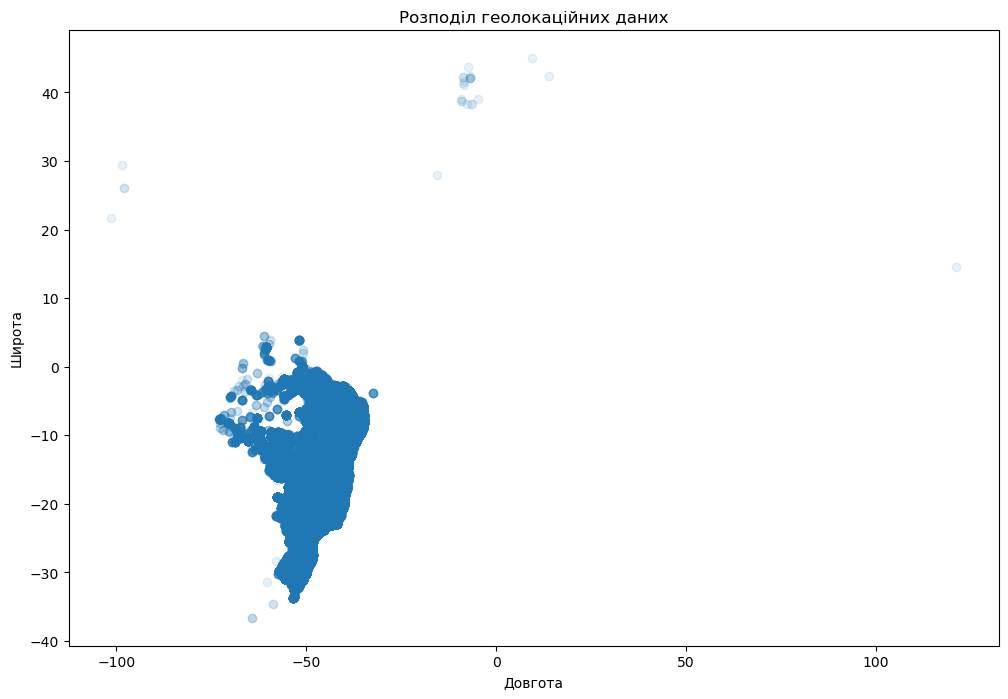

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'], alpha=0.1)
plt.title('Розподіл геолокаційних даних')
plt.xlabel('Довгота')
plt.ylabel('Широта')
plt.show()

In [36]:
# Визначення приблизних меж Південної Америки
lat_min_sa, lat_max_sa = -56.0, 12.5
lon_min_sa, lon_max_sa = -81.5, -34.0

# Знаходження потенційних викидів
outliers = geolocation_df[
    (geolocation_df['geolocation_lat'] < lat_min_sa) | 
    (geolocation_df['geolocation_lat'] > lat_max_sa) | 
    (geolocation_df['geolocation_lng'] < lon_min_sa) | 
    (geolocation_df['geolocation_lng'] > lon_max_sa)
]

print(f"Кількість потенційних викидів: {len(outliers)}")

# Аналіз викидів за містами та штатами
print("\nТоп-10 міст з потенційними викидами:")
print(outliers['geolocation_city'].value_counts().head(10))

print("\nТоп-10 штатів з потенційними викидами:")
print(outliers['geolocation_state'].value_counts().head(10))

# Перевірка на порожні значення
print("\nКількість порожніх значень у викидах:")
print(outliers[['geolocation_city', 'geolocation_state']].isnull().sum())

Кількість потенційних викидів: 29

Топ-10 міст з потенційними викидами:
geolocation_city
fernando de noronha        6
porto trombetas            3
bom retiro da esperanca    1
vila nova de campos        1
areia branca dos assis     1
ilha dos valadares         1
varzea grande              1
vila dos cabanos           1
castelo dos sonhos         1
são josé da mata           1
Name: count, dtype: int64

Топ-10 штатів з потенційними викидами:
geolocation_state
PE    6
PA    5
RJ    4
BA    3
ES    2
MG    2
PR    2
SP    1
AL    1
PB    1
Name: count, dtype: int64

Кількість порожніх значень у викидах:
geolocation_city     0
geolocation_state    0
dtype: int64


In [37]:
outliers

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
387565,18243,28.008978,-15.536867,bom retiro da esperanca,SP
513631,28165,41.614052,-8.411675,vila nova de campos,RJ
513754,28155,42.439286,13.820214,santa maria,RJ
514429,28333,38.381672,-6.328200,raposo,RJ
516682,28595,43.684961,-7.411080,portela,RJ
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES
538557,29654,21.657547,-101.466766,santo antonio do canaa,ES
585242,35179,25.995203,-98.078544,santana do paraíso,MG
585260,35179,25.995245,-98.078533,santana do paraiso,MG
695377,45936,38.323939,-6.775035,itabatan,BA


####  Висновки після аналізу 
- Кількість викидів - 29 
- **Аналіз міст:**
- Fernando de Noronha (6 випадків) є найчастішим "викидом". Це архіпелаг в Атлантичному океані, що належить до штату Пернамбуку (PE).
- Porto Trombetas (3 випадки) - це місто в штаті Пара (PA), розташоване в Амазонії.
- Інші міста мають по одному випадку.
- **Аналіз штатів**:
- Пернамбуку (PE) все ще має найбільшу кількість викидів (6), що відповідає кількості для Fernando de Noronha.
- Пара (PA) на другому місці з 5 викидами.
- Всі згадані штати є реальними штатами Бразилії.

- **Легітимність даних:** Більшість "викидів" здаються легітимними даними з реальних місць у Бразилії, а не помилками в даних.
- **Острівні та віддалені території:** Fernando de Noronha є островом, що пояснює його появу як "викид". Інші локації, такі як Porto Trombetas, можуть бути віддаленими або прикордонними територіями.
- **Дані будуть залишені для подальшого використання та аналізу, вони не є викидами.**

## Order items dataset

In [75]:
# Order items dataset
order_items_df = pd.read_csv('/Users/irasafonik/SMART_business/order_items.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [66]:
order_items_df.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [76]:
# Перетворення дати
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [68]:
order_items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [45]:
check_outliers(order_items_df, 'price')
check_outliers(order_items_df, 'freight_value')

Outliers in price:
         price
7       810.00
16      639.00
26      289.00
30      397.00
39      809.10
...        ...
112586  299.99
112592  278.00
112632  736.00
112645  299.99
112646  350.00

[8427 rows x 1 columns]
Percentage of outliers: 7.48%
Outliers in freight_value:
        freight_value
7               70.75
22              44.40
39              44.29
59              43.11
73              65.56
...               ...
112641          34.19
112642          34.19
112643          34.19
112645          43.41
112646          36.53

[12134 rows x 1 columns]
Percentage of outliers: 10.77%


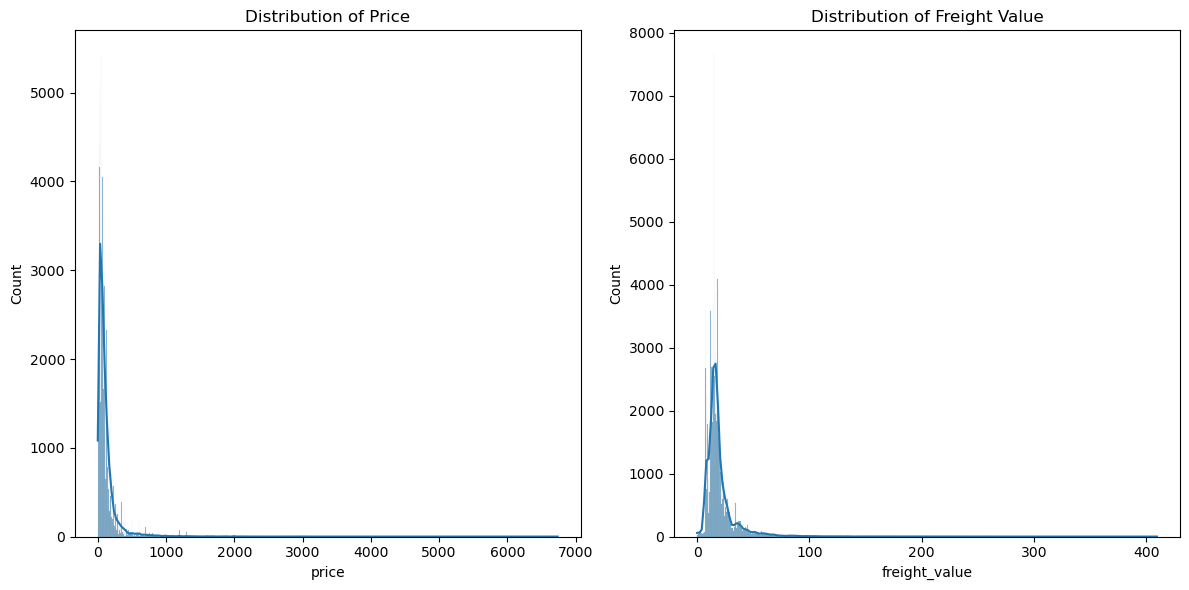

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(order_items_df['price'], kde=True)
plt.title('Distribution of Price')
plt.subplot(1, 2, 2)
sns.histplot(order_items_df['freight_value'], kde=True)
plt.title('Distribution of Freight Value')
plt.tight_layout()
plt.show()

Correlation between price and freight_value: 0.41


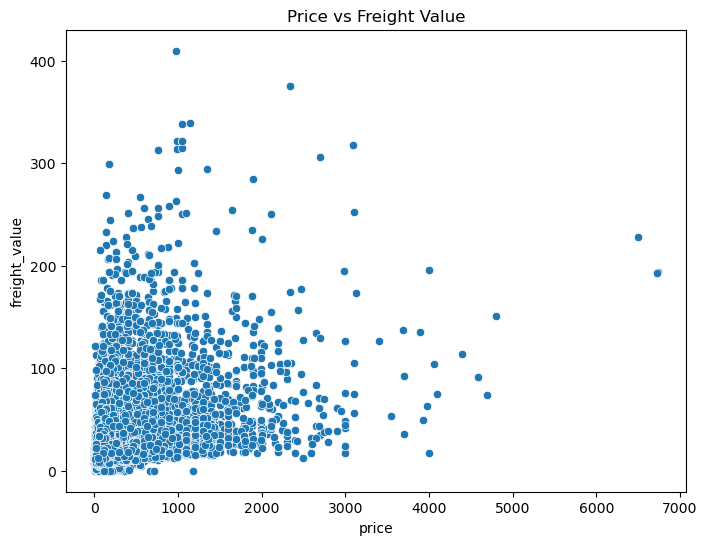

In [47]:
# Аналіз кореляції між 'price' та 'freight_value'
correlation = order_items_df['price'].corr(order_items_df['freight_value'])
print(f"Correlation between price and freight_value: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='freight_value', data=order_items_df)
plt.title('Price vs Freight Value')
plt.show()

In [49]:
# Аналіз топ продавців
top_sellers = order_items_df['seller_id'].value_counts().head(10)
print("Top 10 sellers by number of orders:")
top_sellers

Top 10 sellers by number of orders:


seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: count, dtype: int64


Statistics of items per order:
count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: order_item_id, dtype: float64


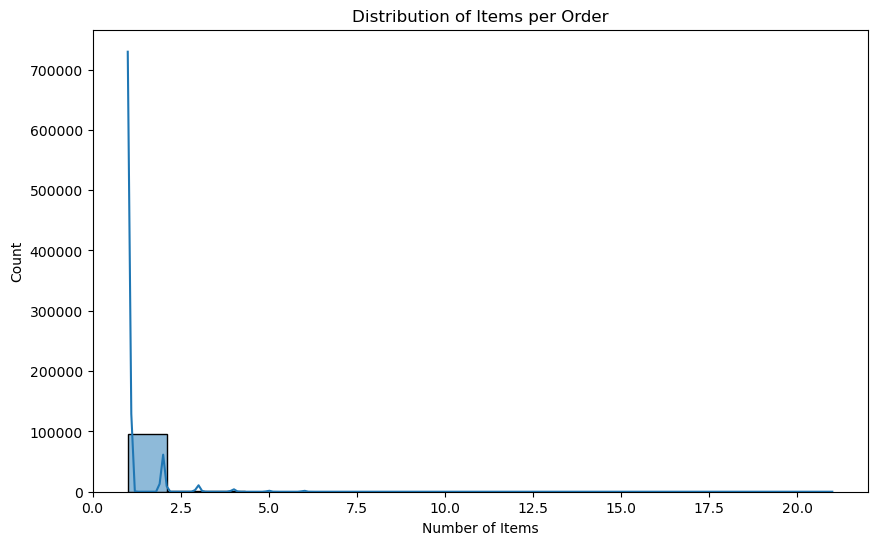

In [51]:
# Аналіз кількості товарів у замовленні
items_per_order = order_items_df.groupby('order_id')['order_item_id'].max()
print("\nStatistics of items per order:")
print(items_per_order.describe())

plt.figure(figsize=(10, 6))
sns.histplot(items_per_order, kde=True)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.show()

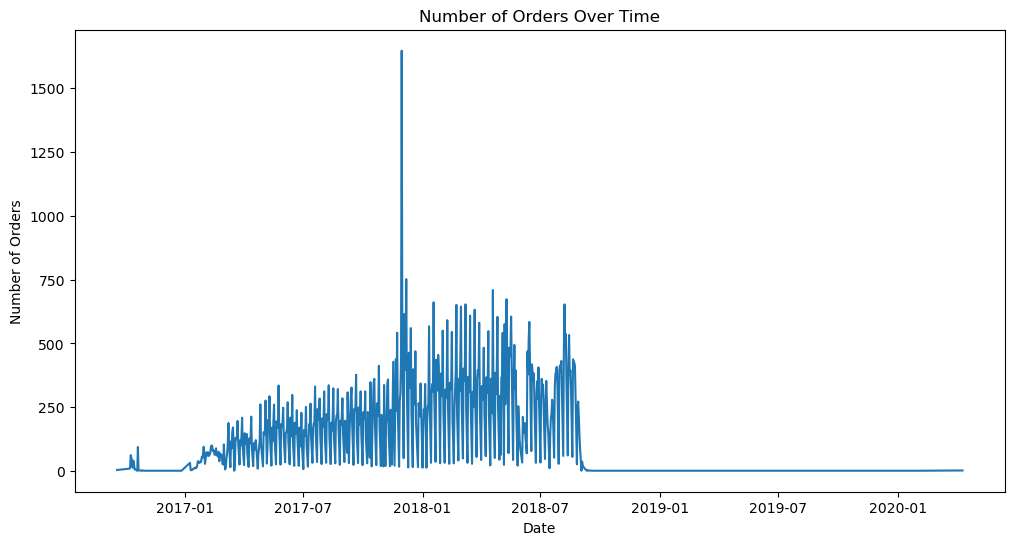

In [64]:
# Часовий тренд замовлень
order_items_df['order_date'] = order_items_df['shipping_limit_date'].dt.date
orders_by_date = order_items_df.groupby('order_date').size()

plt.figure(figsize=(12, 6))
orders_by_date.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

####  Висновки після аналізу 
 **Характеристики замовлень:**
- Більшість замовлень містять лише один товар (середня кількість товарів на замовлення - 1.14).
- Ціни на товари сконцентровані в нижчому діапазоні (до 1000), але є невелика кількість дорогих товарів.
- Вартість доставки здебільшого низька (до 100), що корелює з переважанням недорогих товарів.

 **Цінова політика та доставка:**
- Існує помірна позитивна кореляція (0.41) між ціною товару та вартістю доставки.
- Розподіл цін та вартості доставки сильно зміщений вправо, що вказує на наявність невеликої кількості дорогих товарів та замовлень з високою вартістю доставки.

 **Динаміка замовлень:**
- Спостерігається чітке зростання кількості замовлень з початку 2017 до кінця 2018 року.
- Пік активності припадає на початок 2018 року, з максимумом понад 1500 замовлень за день.

 **Сезонність та коливання:**
- Видно регулярні сезонні коливання в обсягах замовлень протягом року.
- Присутні щоденні коливання, що можуть відображати різницю між будніми та вихідними днями.
- Спостерігаються окремі сплески активності, можливо пов'язані з промо-акціями чи святами.

 **Бізнес-модель:**
- Бізнес орієнтований на продаж великої кількості недорогих товарів з низькою вартістю доставки.
- Невелика частка замовлень з високою вартістю може бути важливим сегментом для прибутковості.
- Модель бізнесу передбачає обробку великої кількості окремих замовлень, що вимагає ефективної логістики.

 **Потенційні області для покращення:**
- Можливість збільшення середньої кількості товарів у замовленні для підвищення ефективності.
- Аналіз причин спаду активності після піку 2018 року для розробки стратегій відновлення зростання.
- Використання даних про сезонність для оптимізації запасів та маркетингових кампаній.

## Order payments dataset

In [78]:
# Order payments dataset
order_payments_df = pd.read_csv('/Users/irasafonik/SMART_business/order_payments.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [70]:
# Перевірка типів даних
order_payments_df.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [71]:
# Зведена статистика
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


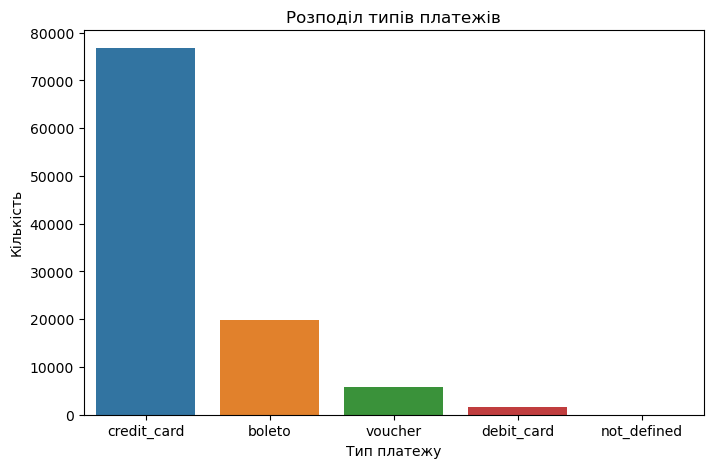

In [72]:
# Розподіл типів платежів
payment_type_counts = order_payments_df['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values)
plt.title('Розподіл типів платежів')
plt.xlabel('Тип платежу')
plt.ylabel('Кількість')
plt.show()

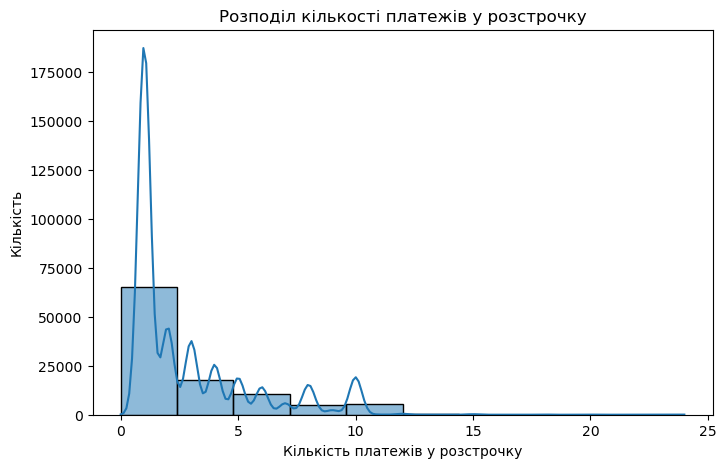

In [73]:
# Розподіл кількості платежів у розстрочку
plt.figure(figsize=(8, 5))
sns.histplot(order_payments_df['payment_installments'], bins=10, kde=True)
plt.title('Розподіл кількості платежів у розстрочку')
plt.xlabel('Кількість платежів у розстрочку')
plt.ylabel('Кількість')
plt.show()

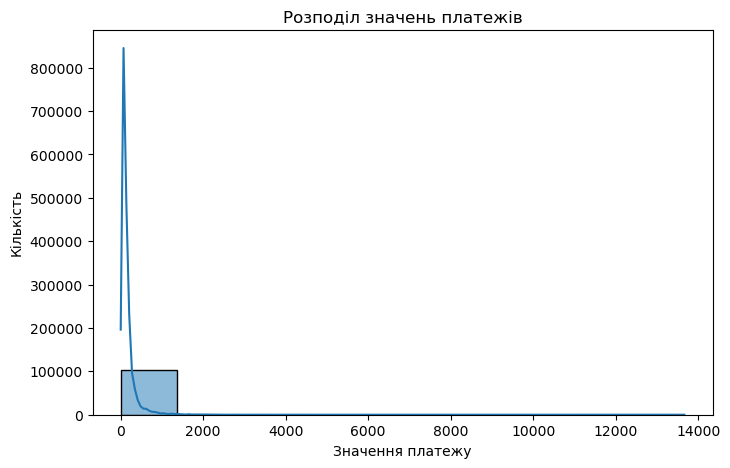

In [74]:
# Розподіл значень платежів
plt.figure(figsize=(8, 5))
sns.histplot(order_payments_df['payment_value'], bins=10, kde=True)
plt.title('Розподіл значень платежів')
plt.xlabel('Значення платежу')
plt.ylabel('Кількість')
plt.show()

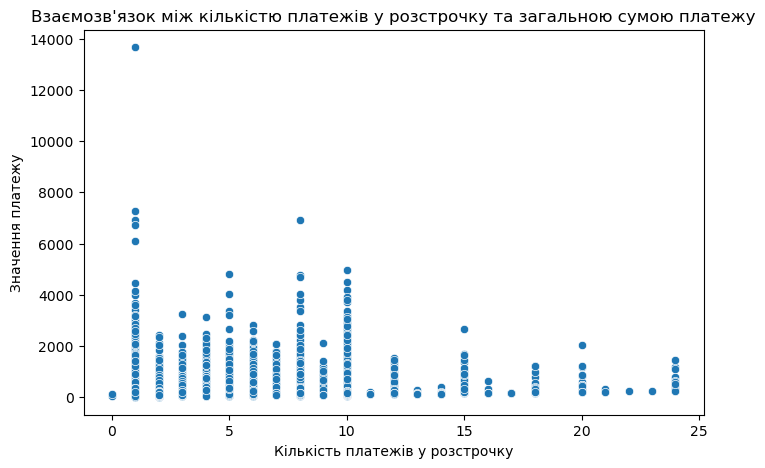

In [75]:
# Взаємозв'язок між кількістю платежів у розстрочку та загальною сумою платежу
plt.figure(figsize=(8, 5))
sns.scatterplot(x='payment_installments', y='payment_value', data=order_payments_df)
plt.title("Взаємозв'язок між кількістю платежів у розстрочку та загальною сумою платежу")
plt.xlabel('Кількість платежів у розстрочку')
plt.ylabel('Значення платежу')
plt.show()

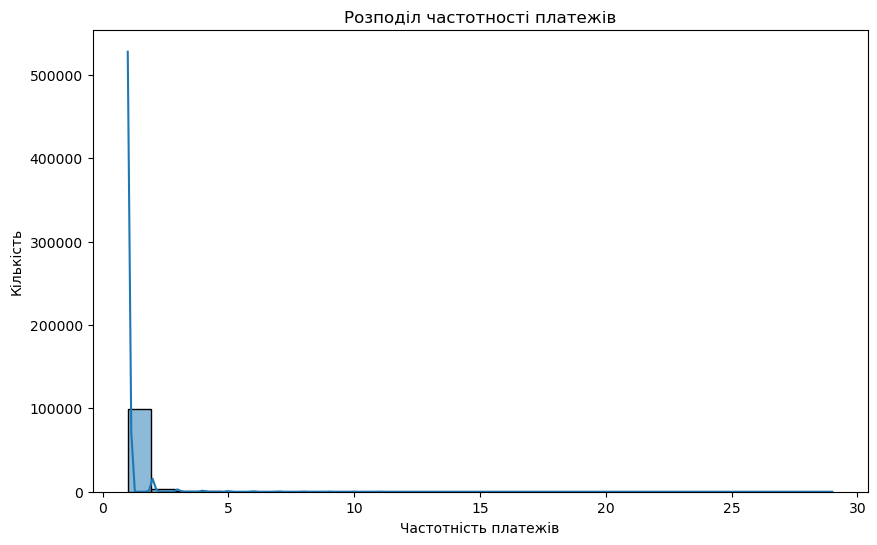

In [89]:
# Розподіл частотності платежів
plt.figure(figsize=(10, 6))
sns.histplot(order_payments_df['payment_sequential'], bins=30, kde=True)
plt.title('Розподіл частотності платежів')
plt.xlabel('Частотність платежів')
plt.ylabel('Кількість')
plt.show()

####  Висновки після аналізу 
 **Графік 1: Розподіл типу платежу** 
 - Найпопулярнішим типом платежу є credit_card, який складає більшість всіх транзакцій (приблизно 75%).
 - boleto займає друге місце, але кількість таких платежів значно менша.
 - voucher, debit_card та not_defined складають дуже малу частку всіх платежів.
 
 **Графік 2: Розподіл кількості платежів у розстрочку**
 - Більшість платежів відбувається без розстрочки (1 платіж).
 - Платежі з 2-4 розстрочками також зустрічаються, але значно рідше.
 - Кількість платежів з більшою кількістю розстрочок (більше 4) є незначною.
 - Є покупки з великою кількістю розстрочок (максимальне значення 24), але вони також є рідкісними.
 
 **Графік 3: Розподіл значень платежів**
 - Більшість платежів мають значення до 500 одиниць валюти.
 - Дуже мала кількість транзакцій має значення вище 1000 одиниць валюти.
 - Є декілька платежів, які досягають значно вищих значень, але вони є рідкісними.

 **Графік 4: Взаємозв'язок між кількістю платежів у розстрочку та загальною сумою платежу**
 - Більшість платежів у розстрочку мають невеликі значення: Це вказує на те, що навіть у випадках використання розстрочки, клієнти схильні розбивати на частини покупки невеликої вартості.
 - Високовартісні транзакції зустрічаються рідко: Незважаючи на наявність деяких великих платежів, вони є винятком, а не правилом, що свідчить про низький попит на дорогі покупки з розстрочкою.
 - Середнє значення платежу складає 154.1.
 - Більшість платежів мають значення до 171.84 (75-й перцентиль).
 - Є платежі з дуже високими значеннями (максимальне значення 13664.08), але вони є рідкісними.
 - Мінімальне значення 0 може вказувати на можливі помилки або спеціальні випадки (наприклад, тестові транзакції).

 **Графік 5: Розподіл частотності платежів**
 - Більшість платежів мають значення 1, що означає, що більшість покупок оплачуються одразу, без використання розстрочки.
 - Невелика кількість платежів має значення 2-4: Платежі, розбиті на кілька частин, зустрічаються рідше, вказуючи на певну частку покупців, які користуються розстрочкою, але не часто.
 - Платежі зі значенням більше 4 є дуже рідкісними, що вказує на те, що довготривала розстрочка майже не використовується (максимальне значення 29).

 **Загальні висновки:**
- Переважна більшість покупців використовують кредитні картки для здійснення покупок.
- Покупки, як правило, оплачуються одразу, без використання розстрочки.
- Середнє значення платежу відносно невелике, більшість покупок мають низьку вартість.
- Більшість платежів у розстрочку мають невеликі значення, а високовартісні транзакції зустрічаються рідко.
- Більшість платежів мають значення 1, що вказує на те, що клієнти рідко розбивають платежі на кілька частин.

#### Хочу розібрати дані з нульовими платежами

In [167]:
# Фільтрація нульових платежів
zero_payments = order_payments_df[order_payments_df['payment_value'] == 0]

# Аналіз типів платежів
payment_types = zero_payments['payment_type'].value_counts()

# Аналіз послідовності платежів
payment_sequences = zero_payments['payment_sequential'].value_counts()

# Аналіз розстрочок
payment_installments = zero_payments['payment_installments'].value_counts()

# Аналіз ідентифікаторів замовлень
order_ids = zero_payments['order_id'].value_counts()

# Вивід результатів
print("Типи платежів з нульовим значенням:\n", payment_types)
print("\nПослідовність платежів з нульовим значенням:\n", payment_sequences)
print("\nКількість розстрочок з нульовим значенням:\n", payment_installments)
print("\nІдентифікатори замовлень з нульовим значенням:\n", order_ids)

Типи платежів з нульовим значенням:
 payment_type
voucher        6
not_defined    3
Name: count, dtype: int64

Послідовність платежів з нульовим значенням:
 payment_sequential
4     3
1     3
14    1
3     1
13    1
Name: count, dtype: int64

Кількість розстрочок з нульовим значенням:
 payment_installments
1    9
Name: count, dtype: int64

Ідентифікатори замовлень з нульовим значенням:
 order_id
fa65dad1b0e818e3ccc5cb0e39231352    2
8bcbe01d44d147f901cd3192671144db    1
6ccb433e00daae1283ccc956189c82ae    1
4637ca194b6387e2d538dc89b124b0ee    1
00b1cb0320190ca0daa2c88b35206009    1
45ed6e85398a87c253db47c2d9f48216    1
c8c528189310eaa44a745b8d9d26908b    1
b23878b3e8eb4d25a158f57d96331b18    1
Name: count, dtype: int64


In [162]:
zero_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


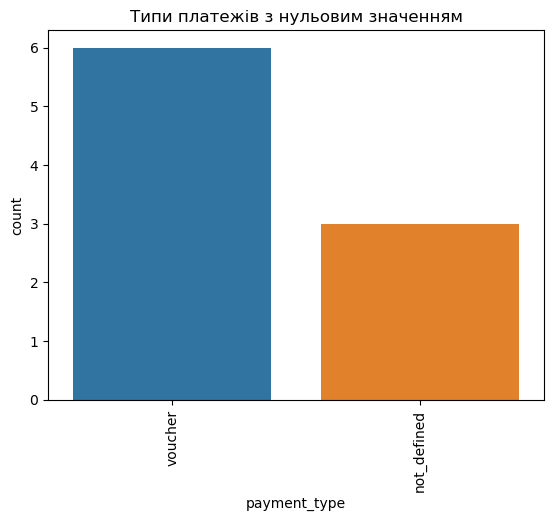

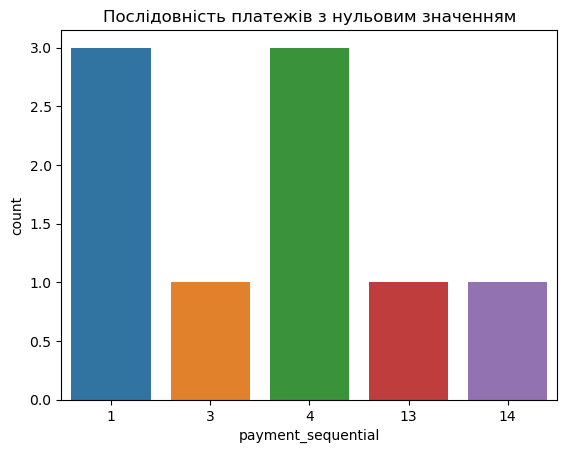

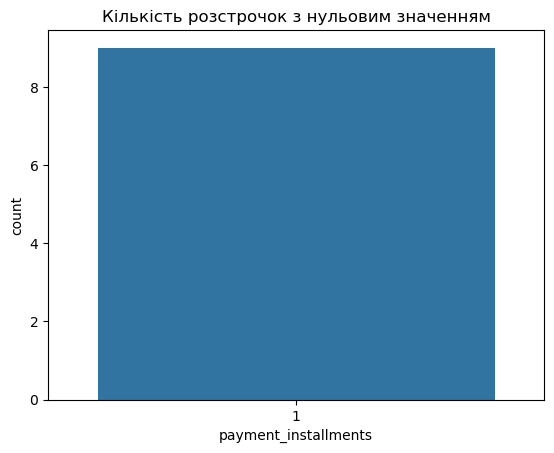

In [94]:
# Візуалізація типів платежів
sns.countplot(x='payment_type', data=zero_payments)
plt.title('Типи платежів з нульовим значенням')
plt.xticks(rotation=90)
plt.show()

# Візуалізація послідовності платежів
sns.countplot(x='payment_sequential', data=zero_payments)
plt.title('Послідовність платежів з нульовим значенням')
plt.show()

# Візуалізація розстрочок
sns.countplot(x='payment_installments', data=zero_payments)
plt.title('Кількість розстрочок з нульовим значенням')
plt.show()

### Висновок

#### Типи платежів з нульовим значенням:
- Найбільша кількість нульових платежів спостерігається у типу `voucher` (6 транзакцій).
- Тип `not_defined` також має теж незначну кількість нульових платежів (3 транзакції).

#### Послідовність платежів з нульовим значенням:
- Більшість нульових платежів припадає на послідовності з номерами 4 та 1 (по 3 транзакції кожна).
- Послідовності з номерами 14, 3, та 13 мають по 1 нульовому платежу кожна.

#### Кількість розстрочок з нульовим значенням:
- Усі нульові платежі були здійснені без розстрочки (всі 9 транзакцій мають `payment_installments` рівне 1).

#### Ідентифікатори замовлень з нульовим значенням:
- Деякі `order_id` мають більше одного нульового платежу, наприклад, `fa65dad1b0e818e3ccc5cb0e39231352` має 2 таких транзакції.
- Інші `order_id` мають лише один нульовий платіж кожен.

### Загальні висновки:
- Нульові значення платежів частіше зустрічаються у типах платежів `voucher` та `not_defined`.
- Більшість нульових платежів здійснюються без розстрочки.
- Варто додатково дослідити причини наявності нульових платежів, особливо для типів `voucher` та `not_defined`, щоб виявити можливі помилки чи специфічні обставини, що призводять до таких результатів.
- Необхідно також звернути увагу на замовлення з кількома нульовими платежами, щоб перевірити, чи не пов’язані вони з повторюваними проблемами або шахрайством.


## Order reviews dataset

In [80]:
# Order reviews dataset
order_reviews_df = pd.read_csv('/Users/irasafonik/SMART_business/order_reviews.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [82]:
# Перетворення колонок з датами до datetime формату
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
title_length                        int64
message_length                      int64
has_comment                          bool
dtype: object

### Цікаво дослідити, чи є зв'язок між наявністю коментаря та оцінкою (review_score).

**Обробка пропущених значень:**
- Для заголовків відгуків буде заповнено "Без заголовка".
- Для повідомлень відгуків буде використана позначка "Без коментаря".

**Аналіз довжини коментарів:**
- Для непустих значень корисно проаналізувати довжину заголовків та повідомлень. Це допоможе зрозуміти, наскільки детальні відгуки залишають користувачі.

**Текстовий аналіз:**
- Для непустих коментарів можна провести аналіз настроїв (sentiment analysis) або вилучення ключових слів.

In [81]:
# Заповнення пропущених значень
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna("No Title")
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna("No Comment")
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Title,No Comment,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No Title,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No Title,No Comment,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,No Title,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [79]:
# Додавання стовпців з довжиною коментарів
order_reviews_df['title_length'] = order_reviews_df['review_comment_title'].str.len()
order_reviews_df['message_length'] = order_reviews_df['review_comment_message'].str.len()

print("Title length statistics:")
print(order_reviews_df['title_length'].describe())
print("\nMessage length statistics:")
print(order_reviews_df['message_length'].describe())

Title length statistics:
count    100000.000000
mean          8.467900
std           2.522402
min           1.000000
25%           8.000000
50%           8.000000
75%           8.000000
max          26.000000
Name: title_length, dtype: float64

Message length statistics:
count    100000.000000
mean         35.067930
std          46.146469
min           1.000000
25%          10.000000
50%          10.000000
75%          43.000000
max         208.000000
Name: message_length, dtype: float64


In [182]:
# Кореляція між оцінками та довжинами повідомлень
correlation = order_reviews_df['review_score'].corr(order_reviews_df['message_length'])
print(f"Кореляція між оцінками та довжинами повідомлень: {correlation}")

# Перевірити на будь який можливий звязок між коментарем та його оцінкою
order_reviews_df['has_comment'] = order_reviews_df['review_comment_message'] != "No Comment"
average_score_with_comment = order_reviews_df[order_reviews_df['has_comment']]['review_score'].mean()
average_score_without_comment = order_reviews_df[~order_reviews_df['has_comment']]['review_score'].mean()

print(f"Середня оцінка з коментарем: {average_score_with_comment}")
print(f"Середня оцінка без коментаря: {average_score_without_comment}")

Кореляція між оцінками та довжинами повідомлень: -0.40081444248181664
Середня оцінка з коментарем: 3.640409072401983
Середня оцінка без коментаря: 4.379470187305784


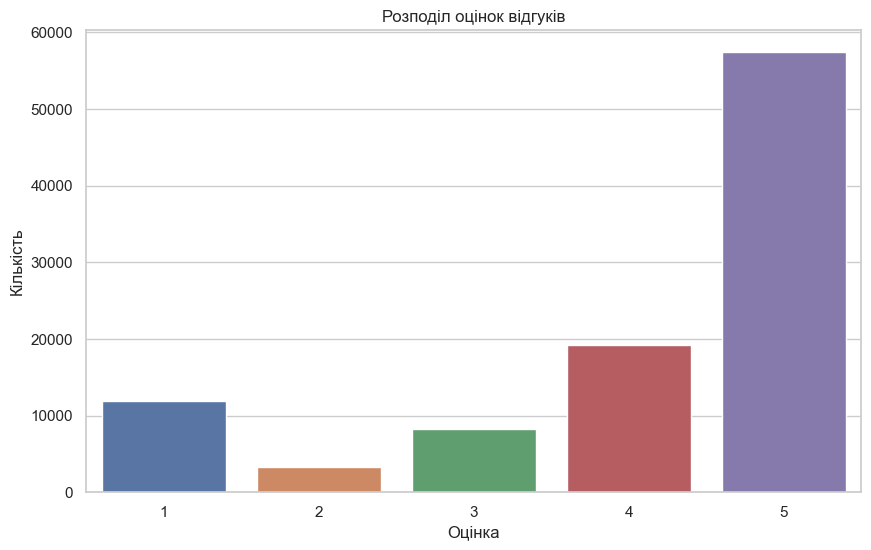

In [174]:
# Гістограма розподілу оцінок
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=order_reviews_df)
plt.title('Розподіл оцінок відгуків')
plt.xlabel('Оцінка')
plt.ylabel('Кількість')
plt.show()

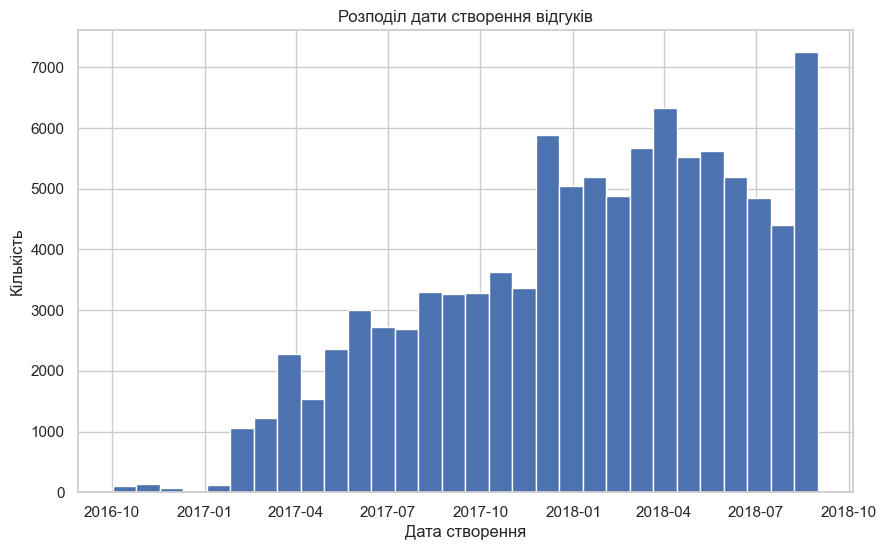

In [180]:
# Розподіл дати створення відгуків
plt.figure(figsize=(10, 6))
order_reviews_df['review_creation_date'].hist(bins=30)
plt.title('Розподіл дати створення відгуків')
plt.xlabel('Дата створення')
plt.ylabel('Кількість')
plt.show()

## Аналіз відгуків

### Розподіл дати створення відгуків
**Тренд:** Загалом, кількість відгуків зростає з часом, досягаючи піку в жовтні 2018 року.  
**Можливі причини:** Це може бути пов'язано з підвищенням популярності платформи або збільшенням кількості користувачів.

### Розподіл оцінок відгуків
**Розподіл:** Більшість відгуків мають оцінку 5. Найменша кількість відгуків має оцінку 2.  
**Інтерпретація:** В цілому користувачі задоволені продуктами чи послугами, що відображається в високих оцінках.

### Довжина повідомлень
**Повідомлення:** Довжина повідомлень сильно варіюється, середнє значення – 35 символів, проте стандартне відхилення дуже велике (46), що вказує на значні коливання в довжині коментарів.

### Кореляція між оцінками та довжинами повідомлень
**Кореляція:** Існує негативна кореляція (-0.40) між оцінками та довжиною повідомлень. Це може свідчити про те, що користувачі з нижчими оцінками схильні писати довші коментарі, можливо, пояснюючи свою незадоволеність.

### Середні оцінки з коментарем та без коментаря
**З коментарем:** Середня оцінка – 3.64.  
**Без коментаря:** Середня оцінка – 4.38.  
**Інтерпретація:** Користувачі, які залишають коментарі, зазвичай дають нижчі оцінки, можливо, тому що їм є що сказати про негативний досвід, тоді як ті, хто задоволений, рідше залишають коментарі.

## Висновки та рекомендації
**Аналіз причин незадоволення:** Виявлення основних причин низьких оцінок через аналіз довгих коментарів.  
**Покращення продуктів/послуг:** Вживання заходів на основі зворотного зв'язку для підвищення задоволеності клієнтів.  
**Залучення користувачів до коментарів:** Заохочення залишати коментарі навіть при високих оцінках для отримання більш повної картини про задоволеність.


## Orders dataset

In [82]:
# Orders dataset
orders_df = pd.read_csv('/Users/irasafonik/SMART_business/orders.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [39]:
orders_df['order_status'].value_counts(normalize=True)

order_status
delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: proportion, dtype: float64

In [40]:
# Конвертація часових колонок у тип datetime:
time_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in time_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

In [208]:
# Виведення загальної інформації про нульові значення
print("Кількість нульових значень у кожному стовпці:")
print(orders_df.isnull().sum())

Кількість нульових значень у кожному стовпці:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delivery_time                    2965
estimated_delivery_time             0
order_month                         0
delivery_delay                   2965
order_day                           0
dtype: int64


In [214]:
# Аналіз статусів замовлень з нульовими значеннями
print("\nСтатуси замовлень для рядків з нульовими значеннями в датах доставки:")
null_status = orders_df[orders_df[['order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1)]['order_status'].value_counts()
print(null_status)


Статуси замовлень для рядків з нульовими значеннями в датах доставки:
order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         9
created           5
approved          2
Name: count, dtype: int64


In [43]:
#Аналіз тривалості доставки:
orders_df['delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df['estimated_delivery_time'] = orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']

print(orders_df['delivery_time'].describe())
print(orders_df['estimated_delivery_time'].describe())

count                         96476
mean     12 days 13:24:31.879068369
std       9 days 13:07:00.181125305
min                 0 days 12:48:07
25%          6 days 18:23:37.250000
50%                10 days 05:13:34
75%         15 days 17:17:16.250000
max               209 days 15:05:12
Name: delivery_time, dtype: object
count                         99441
mean     23 days 18:25:24.953530234
std       8 days 19:58:36.884044268
min                 1 days 15:34:33
25%                18 days 07:57:38
50%                23 days 05:46:08
75%                28 days 10:11:48
max               155 days 03:15:04
Name: estimated_delivery_time, dtype: object


In [42]:
# Аналіз розподілу статусів замовлень
order_status_distribution = orders_df['order_status'].value_counts()

# Аналіз затримок доставки
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days
delivery_delay_stats = orders_df['delivery_delay'].describe()

print("\nOrder status distribution:\n", order_status_distribution)
print("\nDelivery delay statistics:\n", delivery_delay_stats)


Order status distribution:
 order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Delivery delay statistics:
 count    96476.000000
mean       -11.876881
std         10.183854
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64


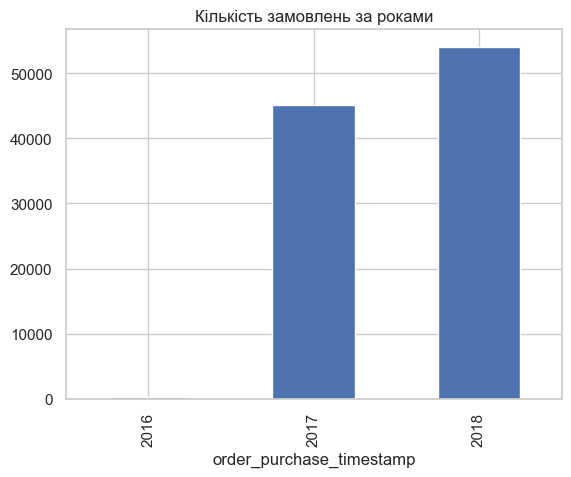

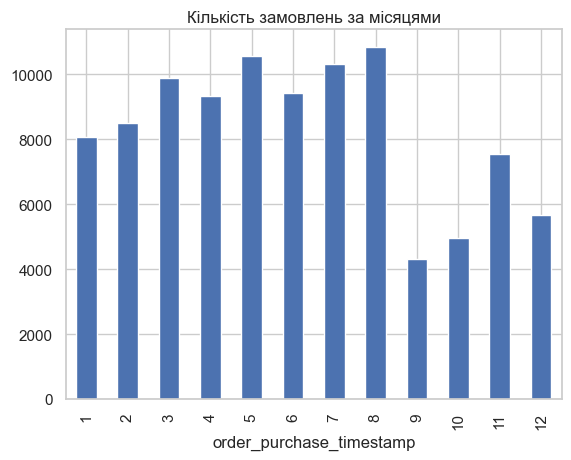

In [188]:
# Аналіз розподілу замовлень за часом:
orders_df['order_purchase_timestamp'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Кількість замовлень за роками')
plt.show()

orders_df['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Кількість замовлень за місяцями')
plt.show()

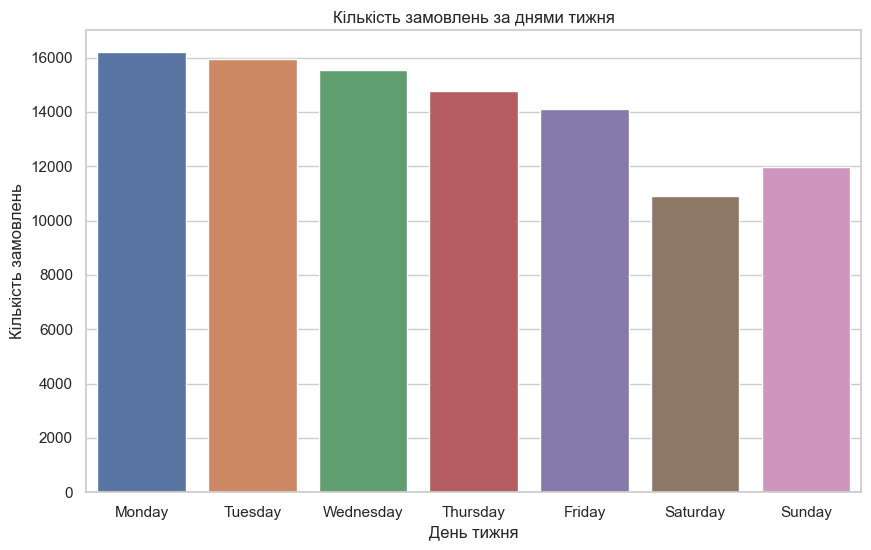

In [202]:
# Аналіз кількості замовлень за днями тижня
orders_df['order_day'] = orders_df['order_purchase_timestamp'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_counts = orders_df['order_day'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts.index, y=order_counts.values)
plt.title('Кількість замовлень за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість замовлень')
plt.show()

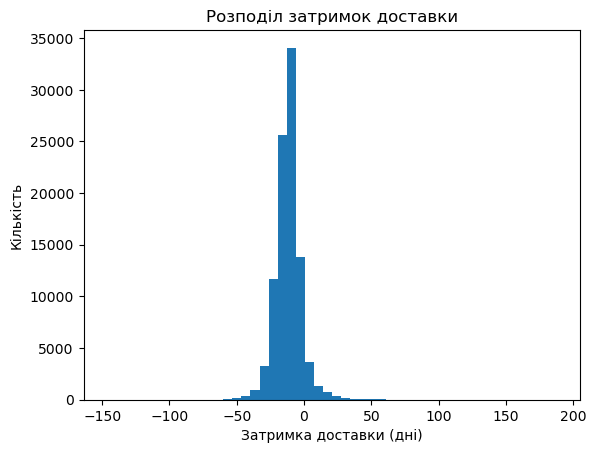

In [47]:
# Візуалізація розподілу затримок доставки
orders_df['delivery_delay'].plot(kind='hist', bins=50)
plt.title('Розподіл затримок доставки')
plt.xlabel('Затримка доставки (дні)')
plt.ylabel('Кількість')
plt.show()

In [59]:
# Виявлення причин відсутніх значень
missing_order_approved = orders_df[orders_df['order_approved_at'].isnull()]
missing_order_delivered_carrier = orders_df[orders_df['order_delivered_carrier_date'].isnull()]
missing_order_delivered_customer = orders_df[orders_df['order_delivered_customer_date'].isnull()]
missing_order_approved

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,delivery_delay
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,NaN,14,NaN
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,NaN,26,NaN
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,NaN,36,NaN
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,NaN,14,NaN
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,NaN,28,NaN
...,...,...,...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25,NaN,22,NaN
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16,NaN,17,NaN
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,NaN,2,NaN
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaN,30,NaN


In [60]:
missing_order_delivered_carrier

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,delivery_delay
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,NaN,27,NaN
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,NaN,17,NaN
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,NaN,29,NaN
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,NaN,18,NaN
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,NaN,64,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaN,30,NaN
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,NaN,31,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,NaN,20,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaN,22,NaN


In [53]:
missing_order_delivered_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,delivery_delay
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,NaT,27 days 11:37:52,NaN
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,NaT,23 days 07:15:12,NaN
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,NaT,17 days 06:15:18,NaN
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,NaT,29 days 09:37:57,NaN
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaT,27 days 12:26:53,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaT,30 days 07:46:16,NaN
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,NaT,31 days 00:52:36,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,NaT,20 days 05:14:13,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaT,22 days 07:31:56,NaN


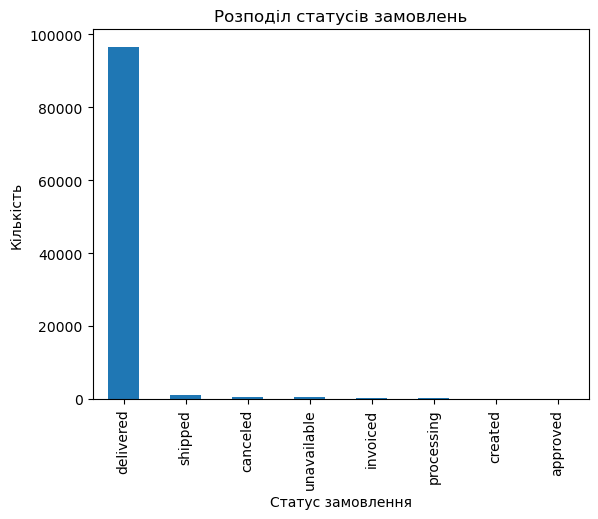

In [49]:
# Візуалізація розподілу статусів замовлень
order_status_counts = orders_df['order_status'].value_counts()
order_status_counts.plot(kind='bar')
plt.title('Розподіл статусів замовлень')
plt.xlabel('Статус замовлення')
plt.ylabel('Кількість')
plt.show()

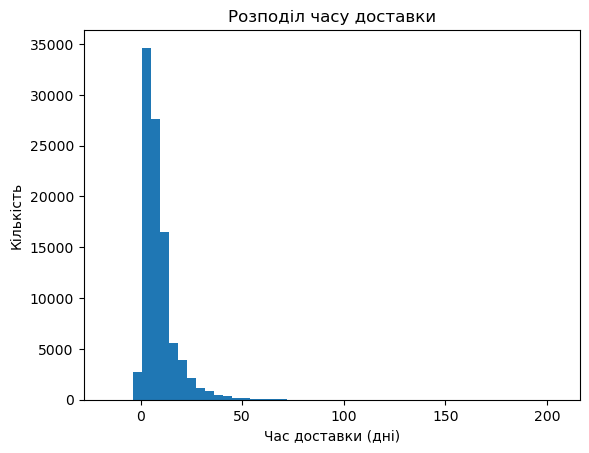

In [61]:
# Візуалізація розподілу часу доставки
orders_df['delivery_time'].plot(kind='hist', bins=50)
plt.title('Розподіл часу доставки')
plt.xlabel('Час доставки (дні)')
plt.ylabel('Кількість')
plt.show()

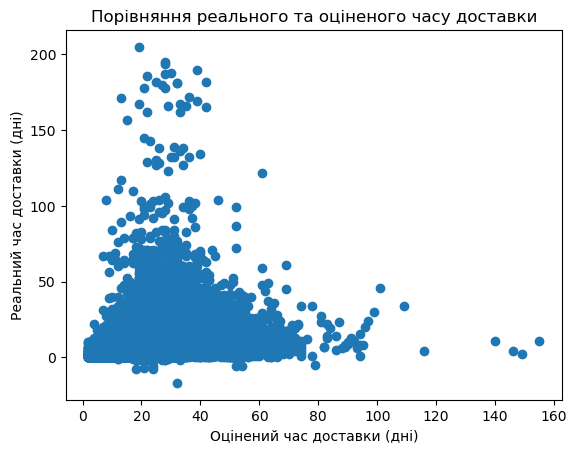

In [62]:
# Візуалізація порівняння реального та оціненого часу доставки
plt.scatter(orders_df['estimated_delivery_time'], orders_df['delivery_time'])
plt.title('Порівняння реального та оціненого часу доставки')
plt.xlabel('Оцінений час доставки (дні)')
plt.ylabel('Реальний час доставки (дні)')
plt.show()

In [63]:
# Аналіз затримок доставки
large_delays = orders_df[orders_df['delivery_delay'] > 0]
small_delays = orders_df[orders_df['delivery_delay'] <= 0]

In [66]:
large_delays

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,delivery_delay
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,22.0,19,3.0
97,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,31.0,18,13.0
110,9d531c565e28c3e0d756192f84d8731f,d4faa220408c20e53595d2950f361f3b,delivered,2017-11-28 21:00:44,2017-12-01 09:31:15,2017-12-14 20:37:43,2018-01-23 21:38:52,2017-12-22,40.0,23,17.0
115,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,delivered,2017-11-26 17:49:46,2017-11-26 17:58:34,2017-11-28 23:17:09,2018-01-20 13:42:22,2017-12-19,52.0,22,30.0
143,33a3edb84b9df4cb49546859b990ac6d,35ec6c1ca9e5844c5ca94214cce16dca,delivered,2018-02-21 17:15:49,2018-02-22 16:10:41,2018-02-23 22:42:43,2018-03-22 00:03:53,2018-03-16,26.0,22,4.0
...,...,...,...,...,...,...,...,...,...,...,...
99279,4cf09d9e5ebbe0f91ddd7bf9aae891cd,07b6b4fe5fefb948fc76b6d2bdba77d8,delivered,2018-07-19 08:37:26,2018-07-21 03:25:17,2018-07-23 15:31:00,2018-08-21 01:12:45,2018-08-10,28.0,21,7.0
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,22.0,19,3.0
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,35.0,18,17.0
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,19.0,18,1.0


In [67]:
small_delays

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,15,-9.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,19,-7.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,-17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,26,-17.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,12,-11.0
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7.0,18,-11.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,20.0,23,-3.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,23.0,30,-7.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13.0,37,-24.0


## Висновок
**Ефективність та зростання бізнесу**
- Висока ефективність доставки: 97.02% замовлень успішно доставлені
- Швидкість доставки: В середньому на 11.88 днів раніше очікуваного терміну
- Зростання: 22% збільшення кількості замовлень з 2017 по 2018 рік

**Часові паттерни**
- Сезонність: Пік у серпні, спад у вересні-жовтні
- Тижневий цикл: Найбільше замовлень на початку тижня, найменше на вихідних

**Аналіз доставки**
- Оцінка часу: Систематична переоцінка часу доставки
- Ефективність: Більшість замовлень доставляються швидше, ніж очікувалося
- Варіативність: Значні відмінності у часі доставки між замовленнями
- Винятки: Невелика кількість замовлень із значними затримками (>100 днів)

**Ключові висновки**
- Бізнес демонструє високу ефективність та стабільне зростання
- Наявні чіткі сезонні та тижневі паттерни замовлень
- Система прогнозування часу доставки потребує оптимізації
- Логістична система працює ефективно, але є простір для вдосконалення

**Рекомендації**
- Вдосконалити систему прогнозування часу доставки
- Розробити маркетингові стратегії з урахуванням сезонності
- Впровадити спеціальні пропозиції на вихідні для балансування навантаження
- Провести аналіз факторів, що сприяють річному зростанню
- Дослідити причини значних затримок у виняткових випадках

## Products dataset

In [83]:
# Products dataset
products_df = pd.read_csv('/Users/irasafonik/SMART_business/products.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
# Виявлення пропущених значень
missing_values_product_df = products_df.isnull().sum()
print(missing_values_product_df)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [7]:
# Знаходження рядків з пропущеними значеннями
missing_values_product_df = products_df[products_df.isnull().any(axis=1)]

# Вивід рядків з пропущеними значеннями
missing_values_product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [13]:
filtered_df = products_df[
    (products_df['product_weight_g'].isnull()) | 
    (products_df['product_length_cm'].isnull()) | 
    (products_df['product_height_cm'].isnull()) | 
    (products_df['product_width_cm'].isnull())
]

# Відображення відфільтрованих даних
filtered_df[['product_id', 'product_category_name', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN


In [18]:
# Видалення 2 рядків, що містять NaN значення в 4 стовпцях, так як не несуть цінності
products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

# Відображення очищених даних
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [22]:
# Заповнення значень NaN на 0. Заміна значень на медіанні, середні є некоректним. Так як рядків 610, все ж вирішила не видаляти. Можливо знадобиться в аналіз так як є унікальне id та є дані 4 останнії колонок. 
products_df.fillna(0, inplace=True)

# Виведення результату для перевірки
products_df[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']]

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,perfumaria,40.0,287.0,1.0
1,artes,44.0,276.0,1.0
2,esporte_lazer,46.0,250.0,1.0
3,bebes,27.0,261.0,1.0
4,utilidades_domesticas,37.0,402.0,4.0
...,...,...,...,...
32946,moveis_decoracao,45.0,67.0,2.0
32947,construcao_ferramentas_iluminacao,41.0,971.0,1.0
32948,cama_mesa_banho,50.0,799.0,1.0
32949,informatica_acessorios,60.0,156.0,2.0


In [23]:
# Виявлення пропущених значень після заповнення
missing_values_product_df = products_df.isnull().sum()
missing_values_product_df

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [26]:
# Підрахуємо кількість унікальних категорій
unique_categories = category_counts.shape[0]
print(f"\nЗагальна кількість унікальних категорій: {unique_categories}")


Загальна кількість унікальних категорій: 74


In [10]:
# Аналіз категорійних даних
print("\nАналіз категорійних даних:")
print(products_df['product_category_name'].value_counts())


Аналіз категорійних даних:
product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


In [31]:
# Виводимо базову статистику
products_df[numeric_columns].describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,47.580594,757.232814,2.148502,2276.472488,30.815078,16.937661,23.196728
std,12.069277,637.750493,1.745738,4282.038731,16.914458,13.637554,12.079047
min,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


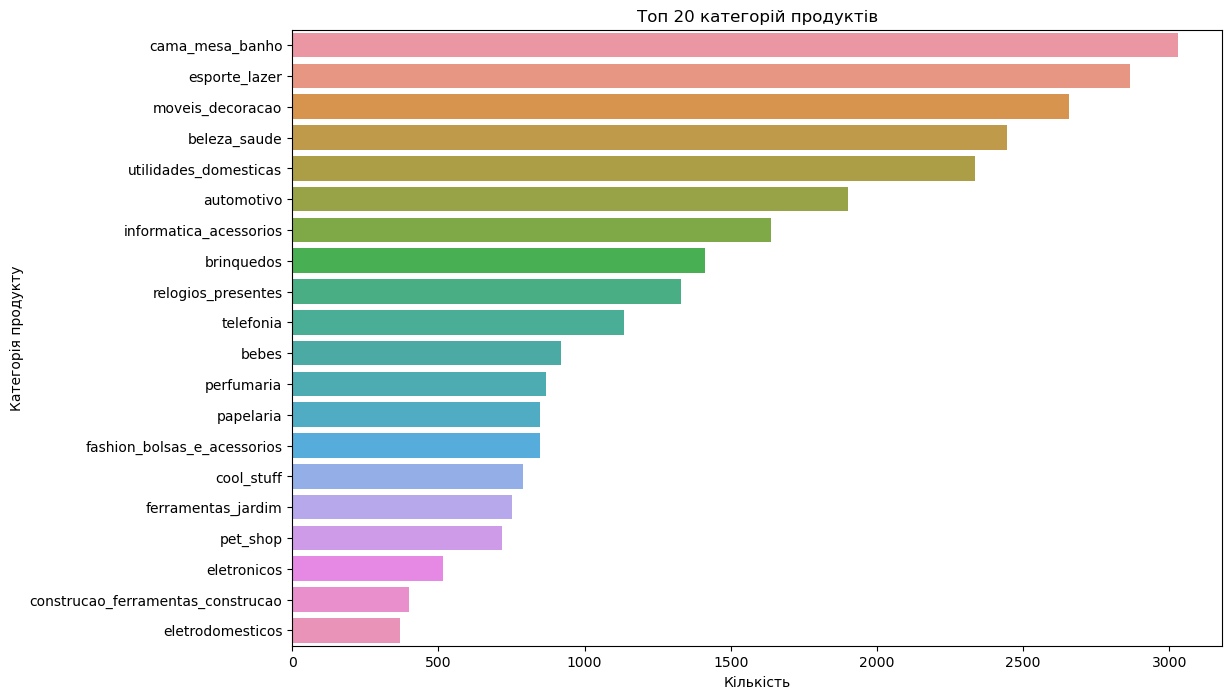

In [12]:
# Топ 20 категорій продуктів
top_20_categories = products_df['product_category_name'].value_counts().head(20).index

# Фільтрація даних для топ 20 категорій
top_20_df = products_df[products_df['product_category_name'].isin(top_20_categories)]

plt.figure(figsize=(12, 8))
sns.countplot(y='product_category_name', data=top_20_df, order=top_20_df['product_category_name'].value_counts().index)
plt.title('Топ 20 категорій продуктів')
plt.xlabel('Кількість')
plt.ylabel('Категорія продукту')
plt.show()

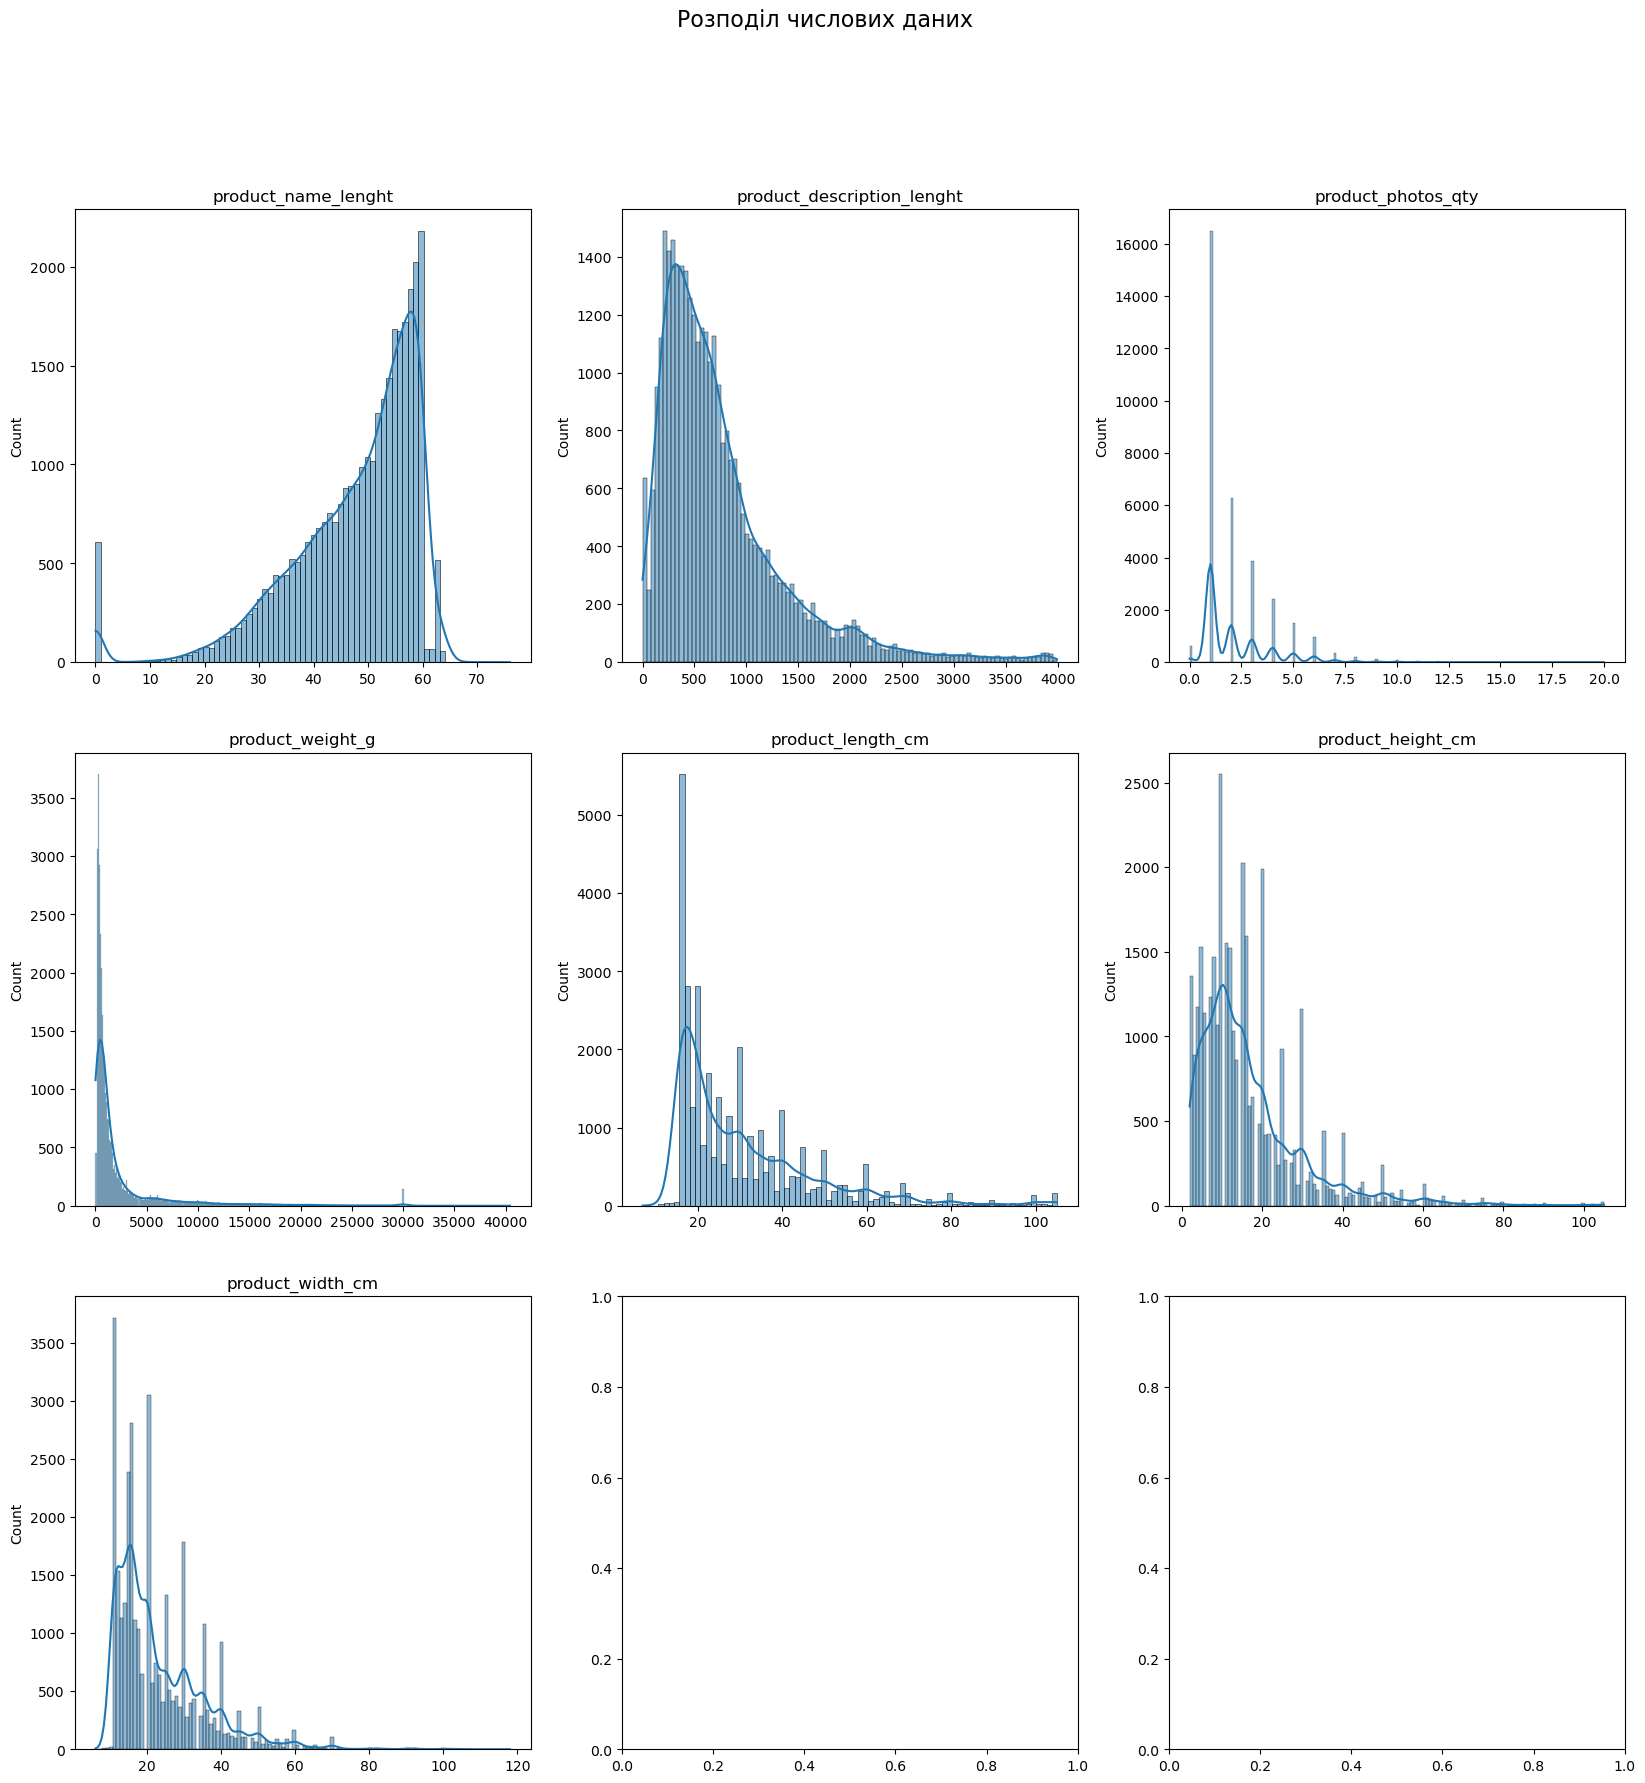

In [28]:
# Вибираємо числові колонки
numeric_columns = products_df.select_dtypes(include=['float64']).columns

# Створюємо підграфіки для кожної числової колонки
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
fig.suptitle('Розподіл числових даних', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    
    # Гістограма
    sns.histplot(products_df[column].dropna(), ax=axes[row, col], kde=True)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')
   

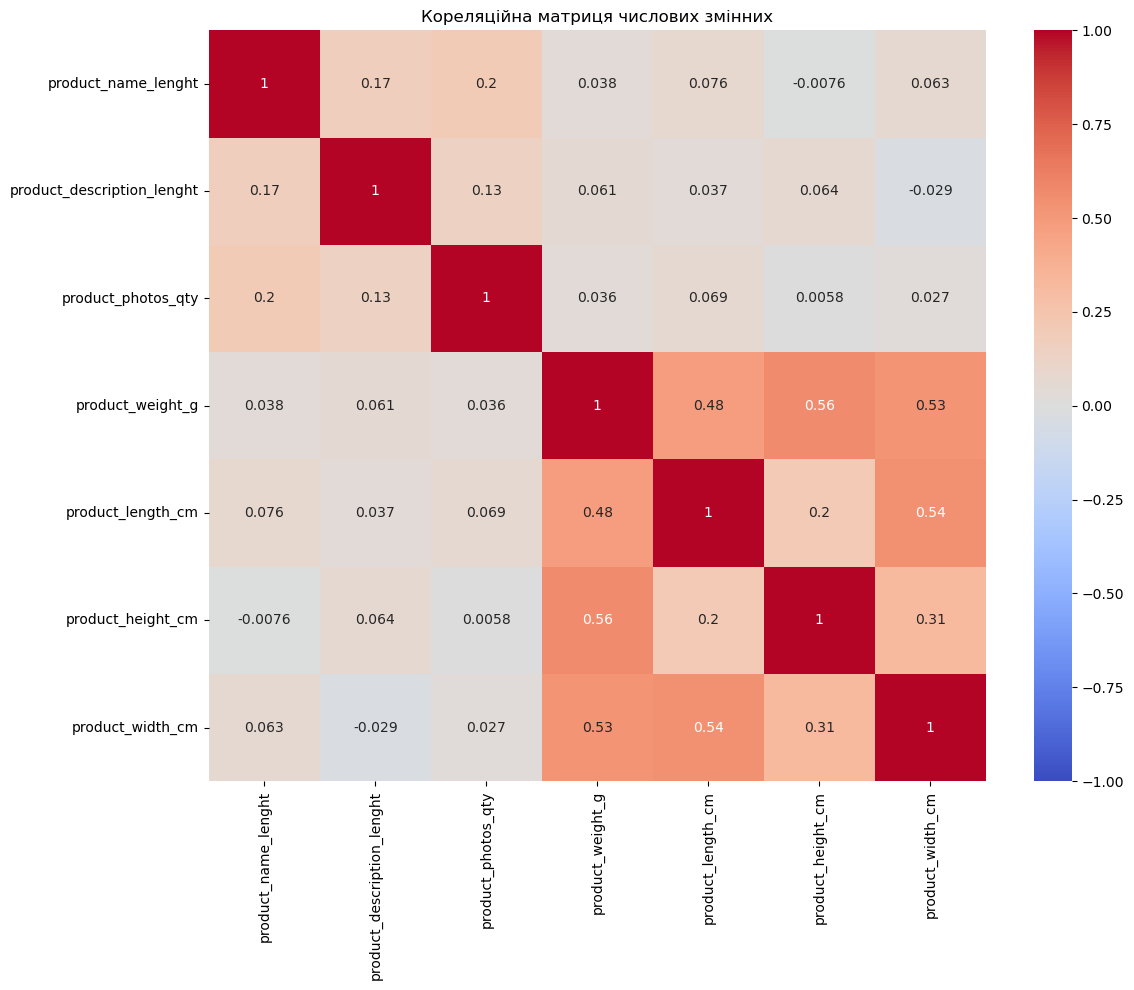

In [32]:
# Вибираємо числові колонки
numeric_columns = products_df.select_dtypes(include=['float64']).columns

# Обчислюємо кореляційну матрицю
correlation_matrix = products_df[numeric_columns].corr()

# Створюємо теплову карту
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Кореляційна матриця числових змінних')
plt.tight_layout()
plt.show()


In [33]:
# Виводимо пари з високою кореляцією (абсолютне значення > 0.5)
high_correlation = correlation_matrix.where(abs(correlation_matrix) > 0.5).unstack().dropna().drop_duplicates()
print("Пари з високою кореляцією (|correlation| > 0.5):")
print(high_correlation)

Пари з високою кореляцією (|correlation| > 0.5):
product_name_lenght  product_name_lenght    1.000000
product_weight_g     product_height_cm      0.563910
                     product_width_cm       0.527597
product_length_cm    product_width_cm       0.542409
dtype: float64


## Висновок

**Загальний огляд асортименту**
- Платформа пропонує широкий асортимент товарів, з акцентом на товари для дому, спорту та відпочинку.

**Топ-3 категорії:**
- Найпопулярніші категорії: cama_mesa_banho (ліжко, стіл, ванна), esporte_lazer (спорт і відпочинок), moveis_decoracao (меблі та декор).

**Характеристики продуктів**
- Назви продуктів зазвичай містять 40-60 символів, що вказує на детальність опису.
- Більшість описів продуктів мають до 1000 символів, з деякими винятками до 3000+ символів.

**Візуальне представлення**
- Більшість продуктів представлені 1-2 фотографіями.
- Невелика кількість товарів має до 20 фотографій.

**Фізичні параметри**
- Вага та розміри продуктів варіюються широко, відображаючи різноманітність асортименту.
- Більшість товарів мають розміри до 50 см і вагу до 5000 г.
- Присутні деякі дуже великі та важкі предмети.

**Кореляції та взаємозв'язки**
- Виявлено логічні кореляції між фізичними параметрами товарів (вага, розміри).
- Слабкі кореляції між текстовими характеристиками та фізичними параметрами.

### Рекомендації
- Покращення візуального представлення: Збільшити кількість фотографій для продуктів, особливо в категоріях, де це критично важливо.
- Оптимізація описів: Знайти баланс між інформативністю та читабельністю описів продуктів.
- Категоризація: Розглянути можливість створення підкатегорій для великих категорій товарів.

## Sellers dataset

In [84]:
# Sellers dataset
sellers_df = pd.read_csv('/Users/irasafonik/SMART_business/sellers.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


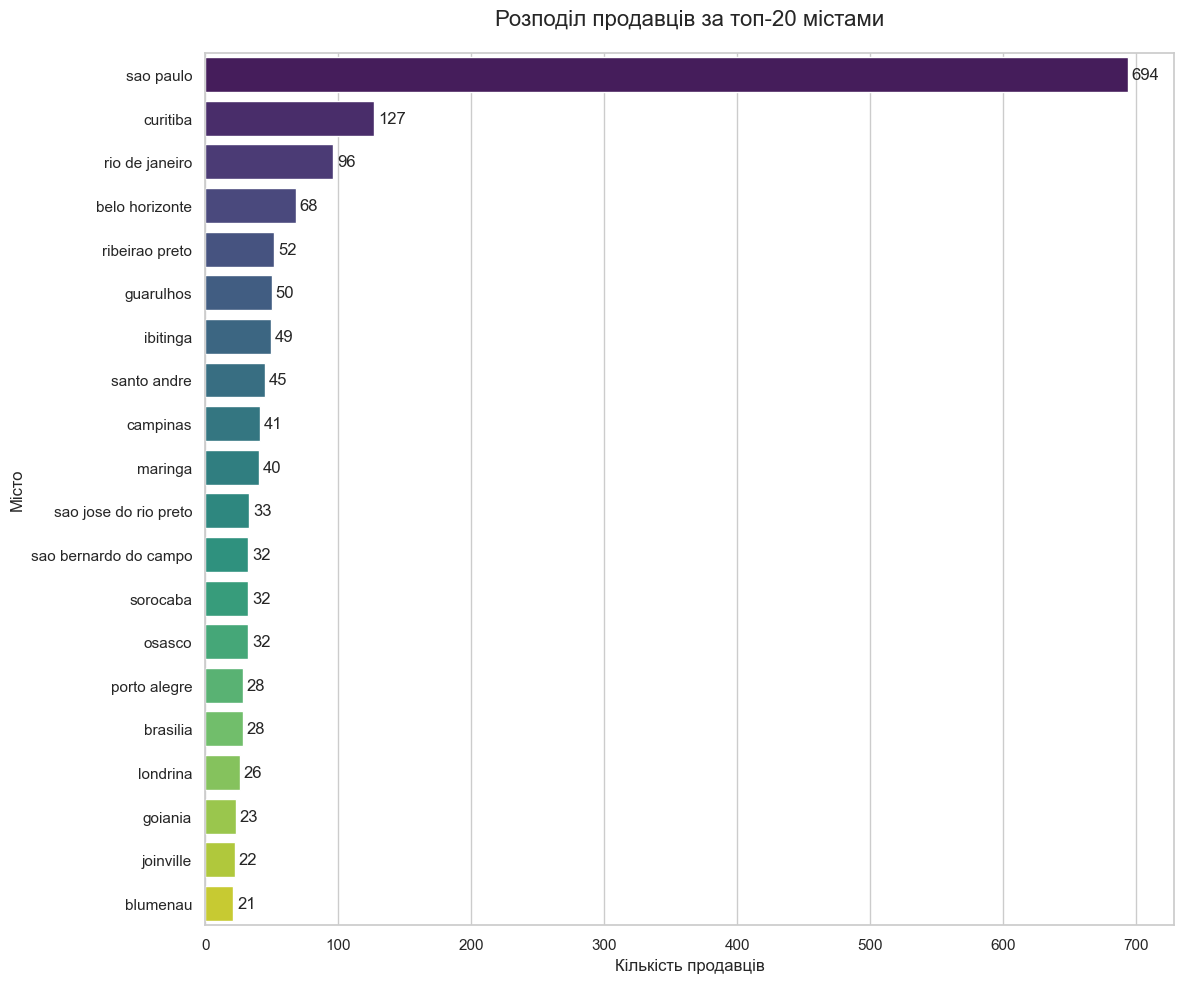

In [125]:
# Розподіл продавців за містами
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Get top 20 cities by seller count
top_20_cities = sellers_df['seller_city'].value_counts().nlargest(20)

# Create the plot
ax = sns.barplot(x=top_20_cities.values, y=top_20_cities.index, palette="viridis")

# Customize the plot
plt.title('Розподіл продавців за топ-20 містами', fontsize=16, pad=20)
plt.xlabel('Кількість продавців', fontsize=12)
plt.ylabel('Місто', fontsize=12)

# Add value labels to the end of each bar
for i, v in enumerate(top_20_cities.values):
    ax.text(v + 3, i, str(v), va='center')

# Adjust layout and display
plt.tight_layout()
plt.show()

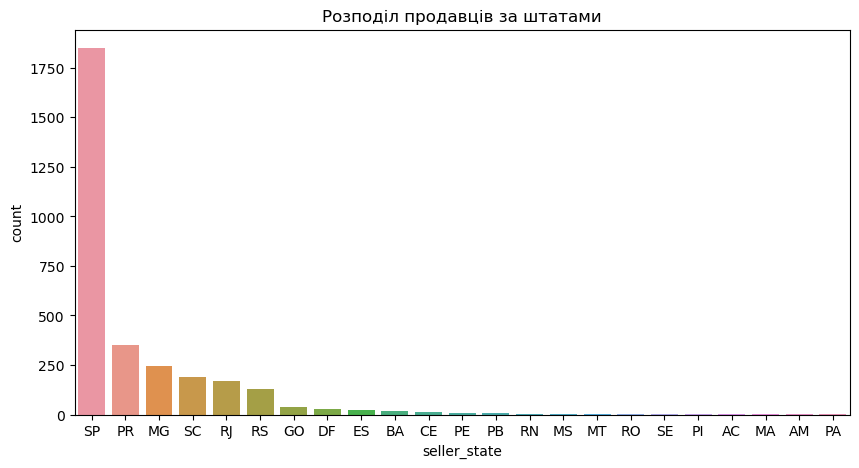

In [121]:
# Розподіл продавців за штатами
plt.figure(figsize=(10, 5))
sns.countplot(x='seller_state', data=sellers_df, order=sellers_df['seller_state'].value_counts().index)
plt.title('Розподіл продавців за штатами')
plt.show()

In [135]:
# 5. Аналіз співвідношення міст до штатів
city_state = sellers_df.groupby('seller_state')['seller_city'].nunique()
print("\nКількість унікальних міст в кожному штаті:")
print(city_state)


Кількість унікальних міст в кожному штаті:
seller_state
AC      1
AM      1
BA     12
CE      7
DF      3
ES     11
GO     12
MA      1
MG     82
MS      2
MT      3
PA      1
PB      5
PE      4
PI      1
PR     67
RJ     38
RN      4
RO      2
RS     51
SC     65
SE      2
SP    261
Name: seller_city, dtype: int64


## Висновки

### Загальний огляд

Dataset містить інформацію про 3,095 продавців з різних міст та штатів Бразилії.

### Розподіл за штатами

1. **Сан-Паулу (SP)** значно випереджає інші штати за кількістю продавців.
2. **Топ-5 штатів** за кількістю продавців:
   - Сан-Паулу (SP)
   - Парана (PR)
   - Мінас-Жерайс (MG)
   - Санта-Катаріна (SC)
   - Ріо-де-Жанейро (RJ)

### Розподіл за містами

1. **Сан-Паулу** є беззаперечним лідером з 694 продавцями.
2. **Інші великі міста** з високою кількістю продавців:
   - Курітіба (127)
   - Ріо-де-Жанейро (96)
   - Белу-Орізонті (68)
   - Рібейран-Прету (52)

### Ключові спостереження

- Спостерігається значна концентрація продавців у південно-східному регіоні Бразилії.
- Економічні центри та великі міста домінують у розподілі.
- Існує суттєва різниця між кількістю продавців у Сан-Паулу та інших містах.

### Можливі наслідки

1. **Логістика**: Може бути простіше організувати доставку в регіонах з високою концентрацією продавців.
2. **Конкуренція**: У містах з великою кількістю продавців може бути вища конкуренція.
3. **Розвиток ринку**: Менші міста та штати можуть мати потенціал для росту та залучення нових продавців.